In [1]:
from pyunpack import Archive
Archive("divorce.rar").extractall('C:/Users/myraw/Jupyter/DSC550')

In [1]:
# import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import seaborn as sns

In [2]:
# Load data into dataframe and check out the dimension of the data
df = pd.read_csv('divorce.csv', sep=';')
print("The dimension of the table is: ", df.shape)

The dimension of the table is:  (170, 55)


In [6]:
# Take a look at the data
df.head()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
0,2,2,4,1,0,0,0,0,0,0,...,2,1,3,3,3,2,3,2,1,1
1,4,4,4,4,4,0,0,4,4,4,...,2,2,3,4,4,4,4,2,2,1
2,2,2,2,2,1,3,2,1,1,2,...,3,2,3,1,1,1,2,2,2,1
3,3,2,3,2,3,3,3,3,3,3,...,2,2,3,3,3,3,2,2,2,1
4,2,2,1,1,1,1,0,0,0,0,...,2,1,2,3,2,2,2,1,0,1


In [5]:
print("Describe Data")
print(df.describe())

Describe Data
             Atr1        Atr2        Atr3        Atr4        Atr5        Atr6  \
count  170.000000  170.000000  170.000000  170.000000  170.000000  170.000000   
mean     1.776471    1.652941    1.764706    1.482353    1.541176    0.747059   
std      1.627257    1.468654    1.415444    1.504327    1.632169    0.904046   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      2.000000    2.000000    2.000000    1.000000    1.000000    0.000000   
75%      3.000000    3.000000    3.000000    3.000000    3.000000    1.000000   
max      4.000000    4.000000    4.000000    4.000000    4.000000    4.000000   

             Atr7        Atr8        Atr9       Atr10  ...       Atr46  \
count  170.000000  170.000000  170.000000  170.000000  ...  170.000000   
mean     0.494118    1.452941    1.458824    1.576471  ...    2.552941   
std      0.898698    1.546371    1

In [8]:
# Now I am going to group the observations by class and compute the mean for each attribute
df_means = df.groupby('Class').mean()
df_means

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr45,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54
Class,,,,,,,,,,,,,,,,,,,,,
0,0.395349,0.465116,0.639535,0.267442,0.104651,0.372093,0.011628,0.127907,0.058140,0.406977,...,1.651163,1.953488,1.244186,2.046512,1.279070,1.383721,1.616279,1.569767,1.186047,0.686047
1,3.190476,2.869048,2.916667,2.726190,3.011905,1.130952,0.988095,2.809524,2.892857,2.773810,...,3.285714,3.166667,3.321429,3.452381,3.511905,3.500000,3.357143,3.488095,3.321429,3.369048


In [44]:
# For plotting purposes I want to transpose this dataframe
means_plot = df_means.T
means_plot.columns = ['divorced', 'married']
means_plot.index.name = 'Attribute'
means_plot.head()

,divorced,married
Attribute,,
Atr1,0.395349,3.190476
Atr2,0.465116,2.869048
Atr3,0.639535,2.916667
Atr4,0.267442,2.726190
Atr5,0.104651,3.011905


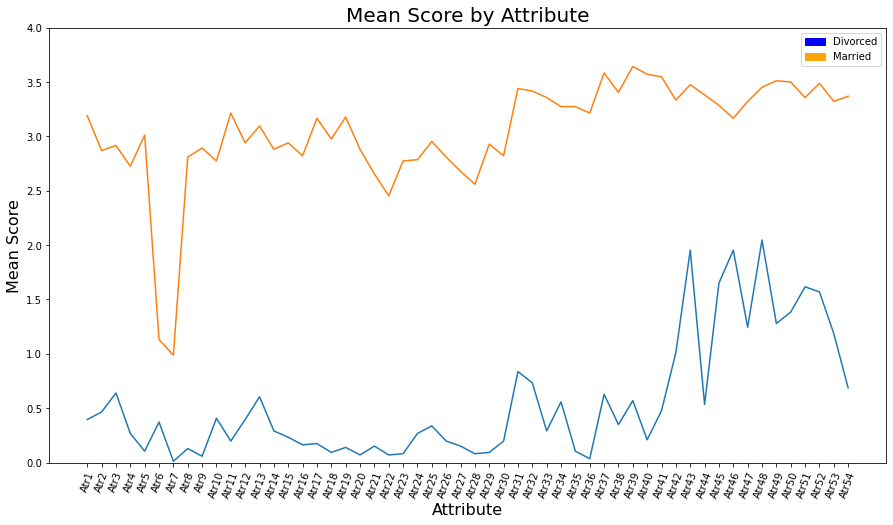

In [71]:
# Now I'm going to plot this using a line.
plt.figure(figsize=(15,8))
plt.plot(means_plot)
plt.title("Mean Score by Attribute", fontsize=20)
plt.xlabel("Attribute", fontsize=16)
plt.xticks(fontsize=10, rotation=70)
plt.yticks(fontsize=10)
plt.ylabel("Mean Score", fontsize=16)
plt.ylim([0, 4])
blue_patch = mpatches.Patch(color='blue', label='Divorced')
orange_patch = mpatches.Patch(color='orange', label='Married')
plt.legend(handles=[blue_patch, orange_patch])
plt.show()

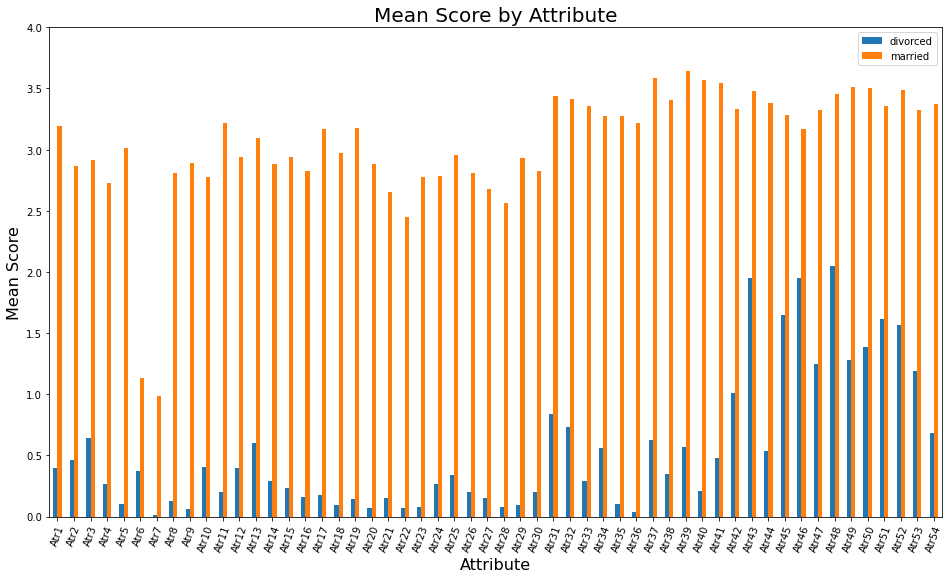

In [72]:
# Plot this using a bar chart. 
plt.rcParams["figure.figsize"] = [16,9]
means_plot.plot.bar()
plt.title("Mean Score by Attribute", fontsize=20)
plt.xlabel("Attribute", fontsize=16)
plt.xticks(fontsize=10, rotation=70)
plt.yticks(fontsize=10)
plt.ylabel("Mean Score", fontsize=16)
plt.ylim([0, 4])
plt.show()


In [ ]:
# The line is definitely better, the bar chart is too busy to see any real trends.

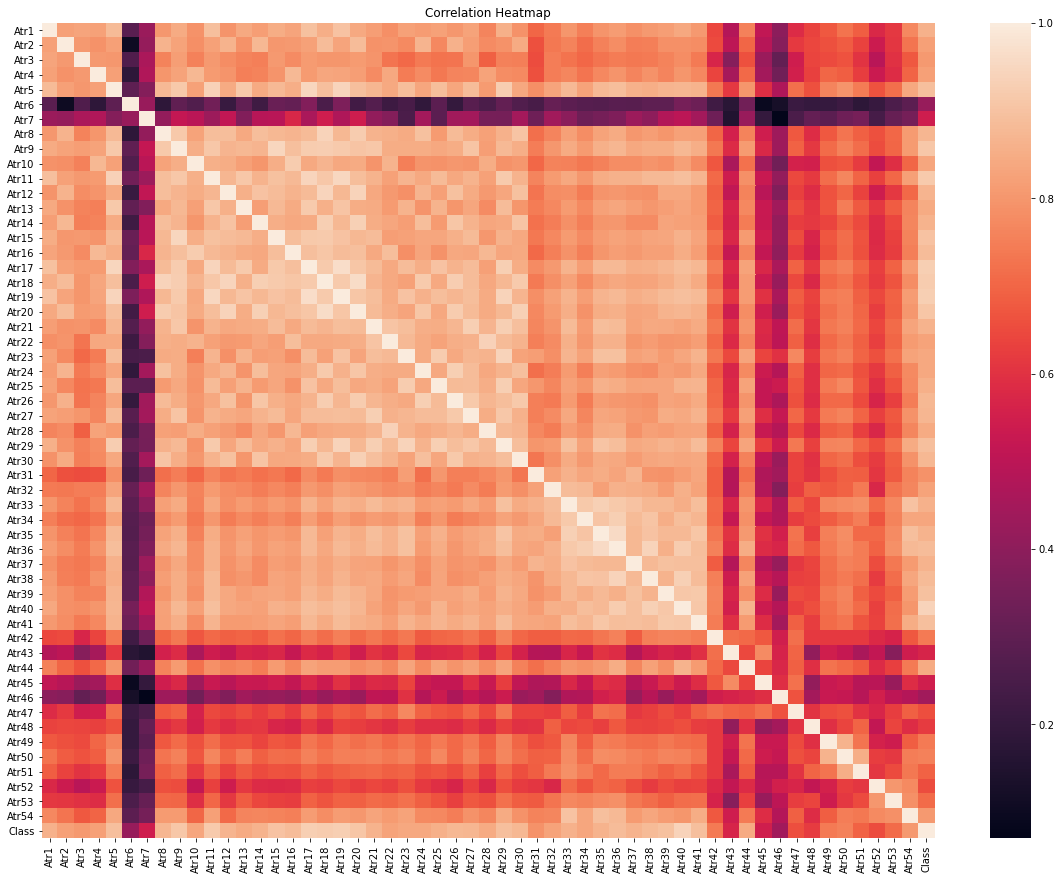

In [7]:
# Use Seaborn to create a correlation heatmap to review for possible relationships
ax = plt.axes()
sns.heatmap(df.corr(), ax = ax)
ax.set_title('Correlation Heatmap')
plt.show()

In [91]:
# The heatmaps are just to cluttered and there are too many variables to make them valuable. But the numbers from the 
# correlation matrix suggest that there could be some valuable relationships between data, like Atr9 & Atr15 have a 
# correlation score of ~0.95.
df.corr()

,Atr1,Atr2,Atr3,Atr4,Atr5,Atr6,Atr7,Atr8,Atr9,Atr10,...,Atr46,Atr47,Atr48,Atr49,Atr50,Atr51,Atr52,Atr53,Atr54,Class
Atr1,1.000000,0.819066,0.832508,0.825066,0.881272,0.287140,0.427989,0.802357,0.845916,0.790183,...,0.400296,0.582693,0.633564,0.674843,0.725443,0.684143,0.575463,0.611422,0.768522,0.861324
Atr2,0.819066,1.000000,0.805876,0.791313,0.819360,0.102843,0.417616,0.864284,0.827711,0.782286,...,0.389519,0.616884,0.643762,0.659841,0.680538,0.636558,0.536294,0.610726,0.728897,0.820774
Atr3,0.832508,0.805876,1.000000,0.806709,0.800774,0.263032,0.464071,0.757264,0.816653,0.753017,...,0.308149,0.544863,0.638256,0.647961,0.663995,0.600603,0.491803,0.598749,0.673012,0.806709
Atr4,0.825066,0.791313,0.806709,1.000000,0.818472,0.185963,0.474806,0.798347,0.829053,0.873636,...,0.340240,0.552301,0.630205,0.699069,0.685263,0.624015,0.534264,0.588390,0.698264,0.819583
Atr5,0.881272,0.819360,0.800774,0.818472,1.000000,0.297834,0.381378,0.877584,0.916327,0.823659,...,0.470758,0.719899,0.659220,0.762257,0.795960,0.742664,0.663855,0.719493,0.836799,0.893180
Atr6,0.287140,0.102843,0.263032,0.185963,0.297834,1.000000,0.424212,0.184019,0.301342,0.266076,...,0.127759,0.212979,0.200673,0.201091,0.221100,0.179119,0.205056,0.258092,0.292428,0.420913
Atr7,0.427989,0.417616,0.464071,0.474806,0.381378,0.424212,1.000000,0.412807,0.517522,0.498266,...,0.069850,0.254225,0.311110,0.291325,0.332370,0.349920,0.243104,0.313725,0.347493,0.544835
Atr8,0.802357,0.864284,0.757264,0.798347,0.877584,0.184019,0.412807,1.000000,0.915301,0.828031,...,0.433541,0.675584,0.588531,0.674776,0.729668,0.690190,0.658613,0.705071,0.807911,0.869569
Atr9,0.845916,0.827711,0.816653,0.829053,0.916327,0.301342,0.517522,0.915301,1.000000,0.852385,...,0.434318,0.693839,0.611726,0.711503,0.755509,0.713750,0.652376,0.699211,0.810977,0.912368
Atr10,0.790183,0.782286,0.753017,0.873636,0.823659,0.266076,0.498266,0.828031,0.852385,1.000000,...,0.342315,0.559998,0.550313,0.659604,0.672236,0.618666,0.513842,0.592641,0.698528,0.834897


In [93]:
# What I'm more interested in though is any correlation the attributes might have with the Class
df.corr()[['Class']].sort_values(by='Class', ascending=False)

,Class
Class,1.000000
Atr40,0.938684
Atr17,0.929346
Atr19,0.928627
Atr18,0.923208
Atr11,0.918386
Atr9,0.912368
Atr20,0.907008
Atr15,0.901220
Atr39,0.896180


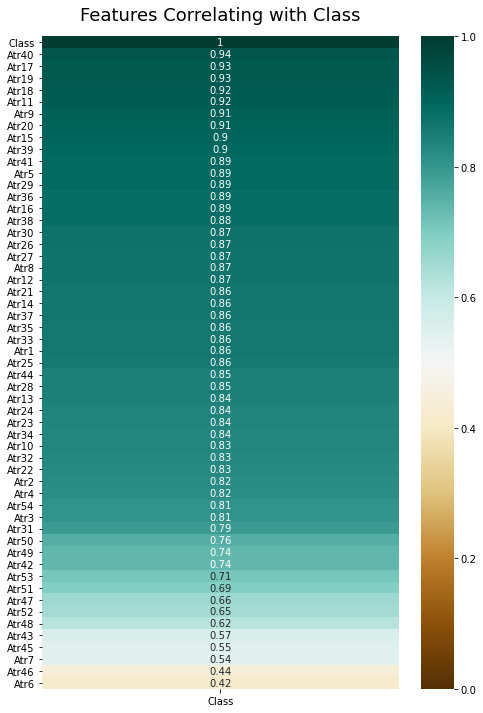

In [95]:
# Plot the information above in a visualization
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(df.corr()[['Class']].sort_values(by='Class', ascending=False), vmin=0, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Features Correlating with Class', fontdict={'fontsize':18}, pad=16);

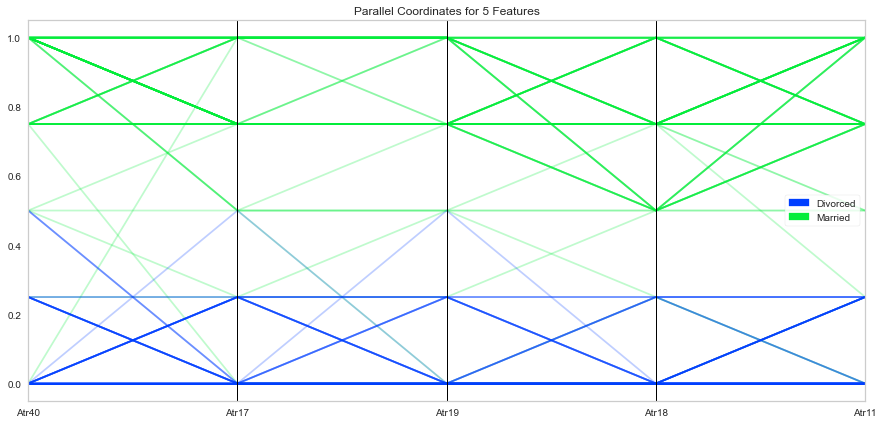

In [98]:
# Take the top 5 features that show they correlate with Class and compare them against Divorced and Married
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (15, 7)
plt.rcParams['font.size'] = 50

# setup the color for yellowbrick visulizer
from yellowbrick.style import set_palette
set_palette('sns_bright')

# import packages
from yellowbrick.features import ParallelCoordinates
# Specify the features of interest and the classes of the target
classes = ['Divorced', 'Married']
num_features = ['Atr40', 'Atr17', 'Atr19', 'Atr18', 'Atr11']

# copy data to a new dataframe
data_norm = df.copy()
# normalize data to 0-1 range
for feature in num_features:
    data_norm[feature] = (df[feature] - df[feature].min(skipna=True)) / (df[feature].max(skipna=True) - df[feature].min(skipna=True))

# Extract the numpy arrays from the data frame
X = data_norm[num_features].values
y = df.Class.values

# Instantiate the visualizer
# Instantiate the visualizer
visualizer = ParallelCoordinates(classes=classes, features=num_features)


visualizer.fit(X, y)      # Fit the data to the visualizer
visualizer.transform(X)   # Transform the data
visualizer.show(outpath=r"C:\Users\myraw\Jupyter\DSC550\div.png") # Draw/show/poof the data
plt.show()

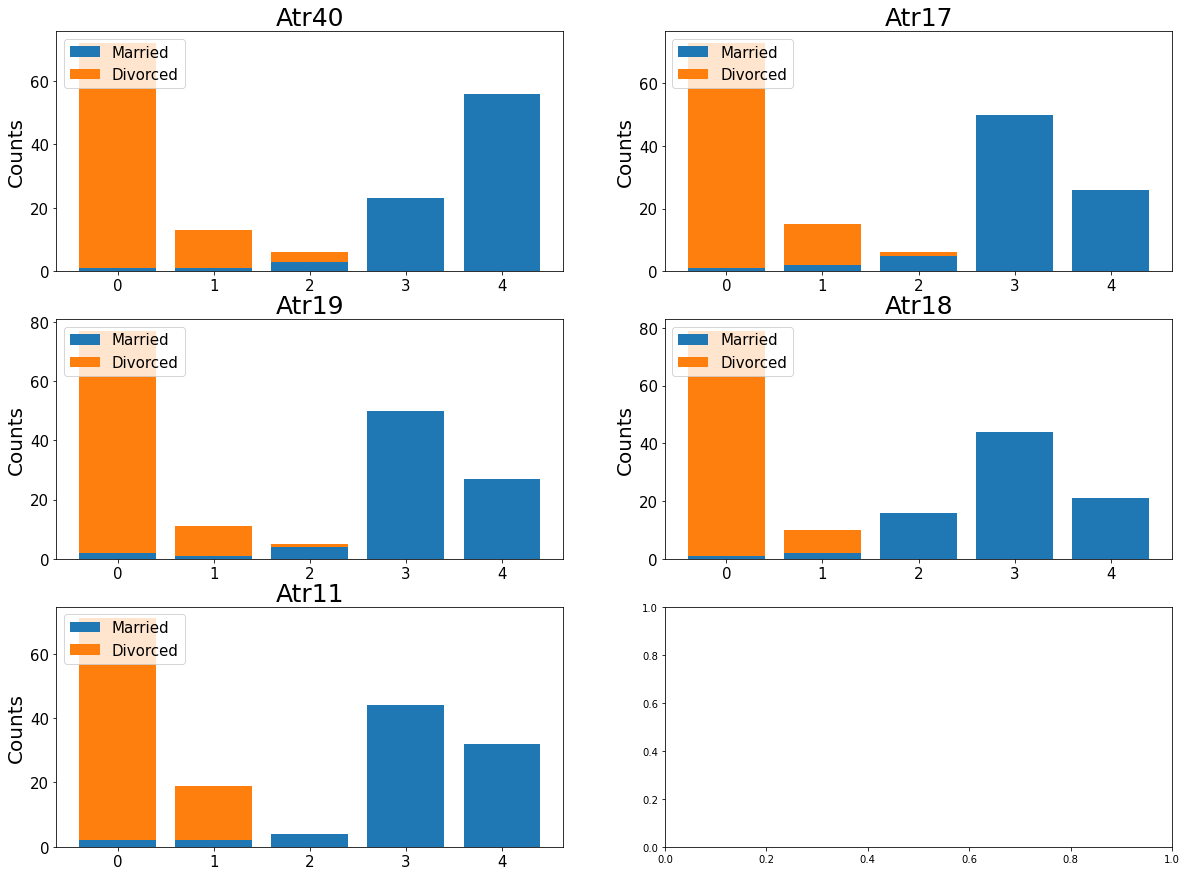

In [6]:
# Take a look at the stacked bar charts to compare divorced/married for the top 5 attributes that correlated to Class
#set up the figure size
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 15)

# make subplots
fig, axes = plt.subplots(nrows = 3, ncols = 2)

# make the data for Atr40 to feed into the visulizer
Atr40_married = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==1]['Atr40'].value_counts()
Atr40_divorced = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==0]['Atr40'].value_counts()
Atr40_divorced = Atr40_divorced.reindex(index = Atr40_married.index)
# make the bar plot
p1 = axes[0, 0].bar(Atr40_married.index, Atr40_married.values)
p2 = axes[0, 0].bar(Atr40_divorced.index, Atr40_divorced.values, bottom=Atr40_married.values)
axes[0, 0].set_title('Atr40', fontsize=25)
axes[0, 0].set_ylabel('Counts', fontsize=20)
axes[0, 0].tick_params(axis='both', labelsize=15)
axes[0, 0].legend((p1[0], p2[0]), ('Married', 'Divorced'), fontsize = 15)

# make the data for Atr17 to feed into the visualizer
Atr17_married = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==1]['Atr17'].value_counts()
Atr17_divorced = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==0]['Atr17'].value_counts()
Atr17_divorced = Atr17_divorced.reindex(index = Atr17_married.index)
# make the bar plot
p3 = axes[0, 1].bar(Atr17_married.index, Atr17_married.values)
p4 = axes[0, 1].bar(Atr17_divorced.index, Atr17_divorced.values, bottom=Atr17_married.values)
axes[0, 1].set_title('Atr17', fontsize=25)
axes[0, 1].set_ylabel('Counts', fontsize=20)
axes[0, 1].tick_params(axis='both', labelsize=15)
axes[0, 1].legend((p3[0], p4[0]), ('Married', 'Divorced'), fontsize = 15)

# make the data for Atr19 to feed into the visualizer
Atr19_married = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==1]['Atr19'].value_counts()
Atr19_divorced = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==0]['Atr19'].value_counts()
Atr19_divorced = Atr19_divorced.reindex(index = Atr19_married.index)
# make the bar plot
p5 = axes[1, 0].bar(Atr19_married.index, Atr19_married.values)
p6 = axes[1, 0].bar(Atr19_divorced.index, Atr19_divorced.values, bottom=Atr19_married.values)
axes[1, 0].set_title('Atr19', fontsize=25)
axes[1, 0].set_ylabel('Counts', fontsize=20)
axes[1, 0].tick_params(axis='both', labelsize=15)
axes[1, 0].legend((p5[0], p6[0]), ('Married', 'Divorced'), fontsize = 15)

# make the data for Atr18 to feed into the visualizer
Atr18_married = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==1]['Atr18'].value_counts()
Atr18_divorced = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==0]['Atr18'].value_counts()
Atr18_divorced = Atr18_divorced.reindex(index = Atr18_married.index)
# make the bar plot
p7 = axes[1, 1].bar(Atr18_married.index, Atr18_married.values)
p8 = axes[1, 1].bar(Atr18_divorced.index, Atr18_divorced.values, bottom=Atr18_married.values)
axes[1, 1].set_title('Atr18', fontsize=25)
axes[1, 1].set_ylabel('Counts', fontsize=20)
axes[1, 1].tick_params(axis='both', labelsize=15)
axes[1, 1].legend((p7[0], p8[0]), ('Married', 'Divorced'), fontsize = 15)

# make the data for Atr11 to feed into the visualizer
Atr11_married = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==1]['Atr11'].value_counts()
Atr11_divorced = df.replace({'Class': {1: 'Class', 0: 'Divorced'}})[df['Class']==0]['Atr11'].value_counts()
Atr11_divorced = Atr11_divorced.reindex(index = Atr11_married.index)
# make the bar plot
p9 = axes[2, 0].bar(Atr11_married.index, Atr11_married.values)
p10 = axes[2, 0].bar(Atr11_divorced.index, Atr11_divorced.values, bottom=Atr11_married.values)
axes[2, 0].set_title('Atr11', fontsize=25)
axes[2, 0].set_ylabel('Counts', fontsize=20)
axes[2, 0].tick_params(axis='both', labelsize=15)
axes[2, 0].legend((p9[0], p10[0]), ('Married', 'Divorced'), fontsize = 15)

plt.show()